<a href="https://colab.research.google.com/github/mark48853/tensorflow/blob/master/tempwithicecream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu==2.0.0

In [0]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pd.read_csv('/content/drive/My Drive/Colab Notebooks/SalesData.csv')
sales_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SalesData.csv')

In [19]:
sales_df.tail(20)

,Temperature,Revenue
480,22.482798,507.900282
481,30.085190,691.855484
482,16.997889,448.325981
483,27.281064,612.241963
484,4.865874,188.151331
485,23.407257,501.345330
486,12.301615,333.334258
487,32.632858,793.079011
488,16.703852,379.318226
489,26.964217,581.074005


In [20]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Temperature    500 non-null float64
Revenue        500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


In [21]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


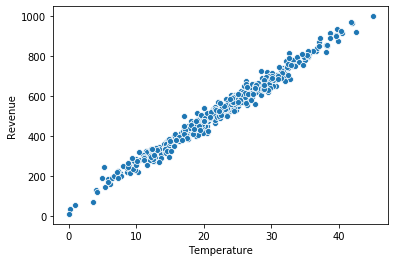

In [22]:
sns.scatterplot(sales_df['Temperature'],sales_df['Revenue '])

In [0]:
x_train = sales_df['Temperature']
y_train = sales_df['Revenue']

In [25]:
x_train.shape

(500,)

In [28]:
y_train.shape

(500,)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape =[1]))

In [55]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss = 'mean_squared_error')

In [0]:
epochs_hist = model.fit(x_train, y_train, epochs = 1000)

In [66]:
epochs_hist.history.keys()

dict_keys(['loss'])

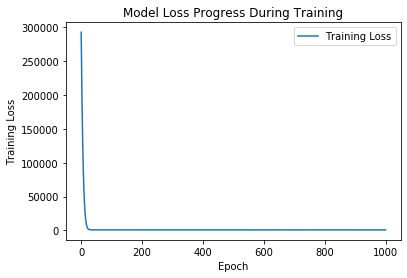

In [67]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [68]:
model.get_weights()

[array([[21.514809]], dtype=float32), array([44.922516], dtype=float32)]

## **The cool part is now**


In [69]:
Temp = 32
Revenue = model.predict([Temp])
print('Revenue Predictions using Trained ANN = ',Revenue)

Revenue Predictions using Trained ANN =  [[733.39636]]


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @ IceCream Stand')

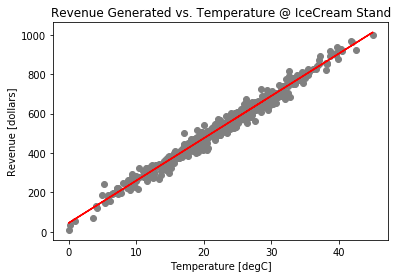

In [86]:
plt.scatter(x_train,y_train, color = "gray")
plt.plot(x_train, model.predict(x_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @ IceCream Stand')

In [77]:
x_train = x_train.reshape(-1,1)
x_train.shape

(500, 1)

In [79]:
y_train = y_train.values.reshape(-1,1)
y_train.shape

(500, 1)

In [88]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = False)
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [90]:
print('Linear Model Coeff(m)',regressor.coef_)
print('Linear Model Coeff(b)', regressor.intercept_)

Linear Model Coeff(m) [[23.22442357]]
Linear Model Coeff(b) 0.0


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @ IceCream Stand')

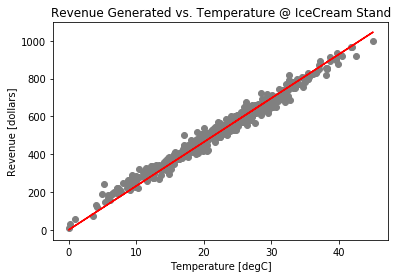

In [91]:
plt.scatter(x_train,y_train, color = "gray")
plt.plot(x_train, regressor.predict(x_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @ IceCream Stand')